In [2]:
!pip install tensorflow
!pip install matplotlib
!pip install ipywidgets

In [2]:
# Import necessary libraries
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import io
import ipywidgets as widgets

# Introduction
This lab is designed to introduce you to the basics of deep learning by interacting with a pre-built model. You'll understand the workflow of a deep learning project, including data preprocessing, model architecture, and making predictions. The goal is to familiarize yourself with the basics of deep learning without writing any code.


In [3]:
# Load the VGG16 model
model = VGG16(weights='imagenet')

# Display the model architecture
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

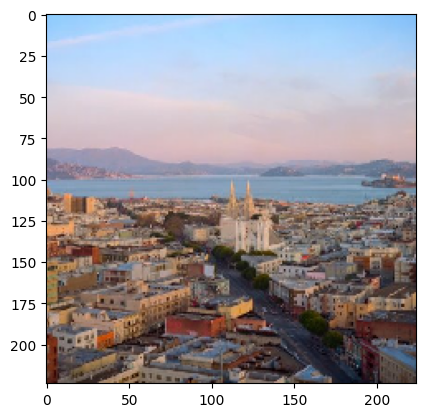

In [4]:
# Load and preprocess an image
def load_and_preprocess_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(224, 224))

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Expand dimensions to fit the model input
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the image
    img_array = preprocess_input(img_array)

    return img, img_array

# Load and preprocess a sample image
sample_image, processed_image = load_and_preprocess_image('sample.jpeg')

# Display the sample image
plt.imshow(sample_image)
plt.show()

In [5]:
# Make predictions
predictions = model.predict(processed_image)

# Decode and print the predictions
decoded_predictions = decode_predictions(predictions, top=3)[0]
print(decoded_predictions)

1/1 [==============================] - 1s 805ms/step
[('n09428293', 'seashore', 0.478938), ('n03216828', 'dock', 0.08425491), ('n03220513', 'dome', 0.042956565)]


FileUpload(value={}, description='Upload')

Button(description='Make Prediction', style=ButtonStyle())


 Aleister_Crowley.jpg


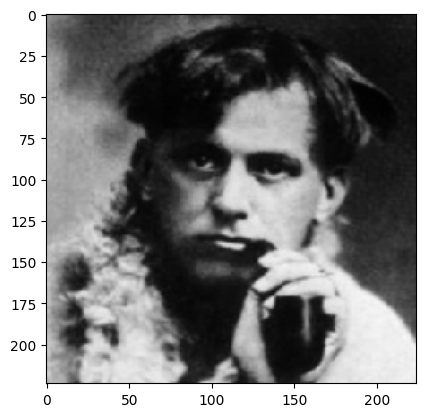

1/1 [==============================] - 1s 605ms/step
[('n03759954', 'microphone', 0.22293237), ('n04141076', 'sax', 0.10728399), ('n03110669', 'cornet', 0.07467181)]

 Dog.jpeg


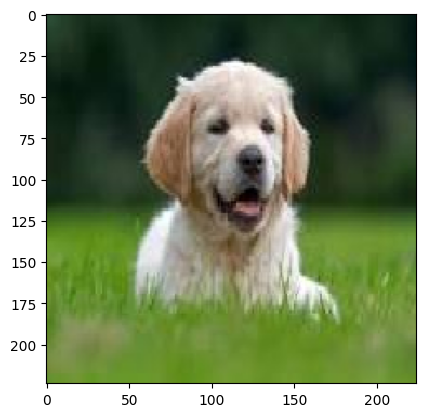

1/1 [==============================] - 1s 588ms/step
[('n02099601', 'golden_retriever', 0.874868), ('n02111500', 'Great_Pyrenees', 0.02375155), ('n02101556', 'clumber', 0.016216546)]

 Edward Hopper, Nighthawks.jpg


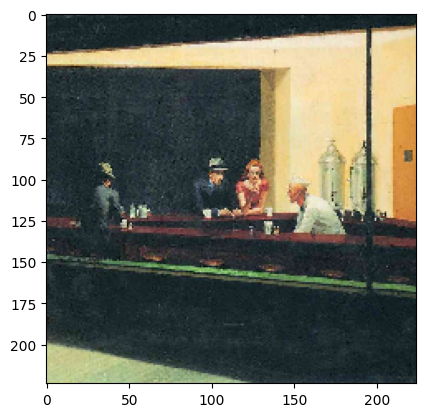

1/1 [==============================] - 1s 591ms/step
[('n03982430', 'pool_table', 0.56623054), ('n03447447', 'gondola', 0.30732882), ('n03777568', 'Model_T', 0.025688976)]


In [9]:
# Upload button to load images
upload = widgets.FileUpload()
display(upload)

# Button to make predictions
predict_button = widgets.Button(description="Make Prediction")
display(predict_button)

# Function to handle button click
def on_click(change):
    name = list(upload.value.values())[0]['metadata']['name']
    print('\n', name)
    sample_image, processed_image = load_and_preprocess_image(name)
    plt.imshow(sample_image)
    plt.show()
    img_data = list(upload.value.values())[0]['content']
    img = Image.open(io.BytesIO(img_data))
    img = img.resize((224, 224))

    # Preprocess and predict
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=3)[0]

    # Display predictions
    print(decoded_predictions)

predict_button.on_click(on_click)

# Conclusion and Discussion
Reflect on the lab activities. Discuss how the pre-trained model was able to make predictions, the role of data preprocessing, and the impact of input modifications on the model's predictions.


The model failed fairly spectacularly except on the image of the dog. Given that another student said he had success with a cat, my guess is that it has been trained on household animals.

Especially ridiculous was predicting that the choices for a human were: 'microphone', 'sax', or 'cornet'.